In [2]:
import tensorflow as tf
from tensorflow import keras
import librosa
import librosa.display
import os
from glob import glob
import numpy as np
import pandas as pd
import random
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Input, LSTM, Dense
import matplotlib as mpl

font = {'size'   : 10}

mpl.rcParams.update({'font.size':10})

pd.set_option('display.max_columns', None)


In [3]:
os.getcwd()

'/Users/sudhanshumishra/Desktop/tf_exercise/Assessment2'

In [4]:
df = pd.read_csv("./data/train_curated.csv")
df.head()

,fname,labels
0,0006ae4e.wav,Bark
1,0019ef41.wav,Raindrop
2,001ec0ad.wav,Finger_snapping
3,0026c7cb.wav,Run
4,0026f116.wav,Finger_snapping


In [5]:
df1 = pd.read_csv("./data/sample_submission.csv")
labels = list(df1.columns)[1:]
for l in labels:
    df[l] = 0

In [6]:
audios = glob(os.path.join("data","train_curated/*.wav"))
# audios[:10]
fnames = [Path(f).name for f in audios]
fnames[:10]

['ffe2178b.wav',
 'cab5c701.wav',
 '2e91c90e.wav',
 '673acd6f.wav',
 '7350958e.wav',
 '2e906a57.wav',
 '2f2b8620.wav',
 '636430b9.wav',
 '82c40c96.wav',
 'b5d64c28.wav']

In [7]:
# test_files = [ df.loc[l in df["labels"]]["fname"].head(1) for l in labels]
# test_files
# for l in labels:
#     if l in df["labels"].values:
#         print(l,df.loc[].head(1))
# df.loc[df["labels"] == labels[0]]


In [8]:
df.head()

,fname,labels,Accelerating_and_revving_and_vroom,Accordion,Acoustic_guitar,Applause,Bark,Bass_drum,Bass_guitar,Bathtub_(filling_or_washing),Bicycle_bell,Burping_and_eructation,Bus,Buzz,Car_passing_by,Cheering,Chewing_and_mastication,Child_speech_and_kid_speaking,Chink_and_clink,Chirp_and_tweet,Church_bell,Clapping,Computer_keyboard,Crackle,Cricket,Crowd,Cupboard_open_or_close,Cutlery_and_silverware,Dishes_and_pots_and_pans,Drawer_open_or_close,Drip,Electric_guitar,Fart,Female_singing,Female_speech_and_woman_speaking,Fill_(with_liquid),Finger_snapping,Frying_(food),Gasp,Glockenspiel,Gong,Gurgling,Harmonica,Hi-hat,Hiss,Keys_jangling,Knock,Male_singing,Male_speech_and_man_speaking,Marimba_and_xylophone,Mechanical_fan,Meow,Microwave_oven,Motorcycle,Printer,Purr,Race_car_and_auto_racing,Raindrop,Run,Scissors,Screaming,Shatter,Sigh,Sink_(filling_or_washing),Skateboard,Slam,Sneeze,Squeak,Stream,Strum,Tap,Tick-tock,Toilet_flush,Traffic_noise_and_roadway_noise,Trickle_and_dribble,Walk_and_footsteps,Water_tap_and_faucet,Waves_and_surf,Whispering,Writing,Yell,Zipper_(clothing)
0,0006ae4e.wav,Bark,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0019ef41.wav,Raindrop,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,001ec0ad.wav,Finger_snapping,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0026c7cb.wav,Run,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0026f116.wav,Finger_snapping,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
def set_label(x):
    labels = x.strip("\"").split(",")
    return labels

df["labels"] = df["labels"].apply(lambda x: set_label(x))
df.head(20)

,fname,labels,Accelerating_and_revving_and_vroom,Accordion,Acoustic_guitar,Applause,Bark,Bass_drum,Bass_guitar,Bathtub_(filling_or_washing),Bicycle_bell,Burping_and_eructation,Bus,Buzz,Car_passing_by,Cheering,Chewing_and_mastication,Child_speech_and_kid_speaking,Chink_and_clink,Chirp_and_tweet,Church_bell,Clapping,Computer_keyboard,Crackle,Cricket,Crowd,Cupboard_open_or_close,Cutlery_and_silverware,Dishes_and_pots_and_pans,Drawer_open_or_close,Drip,Electric_guitar,Fart,Female_singing,Female_speech_and_woman_speaking,Fill_(with_liquid),Finger_snapping,Frying_(food),Gasp,Glockenspiel,Gong,Gurgling,Harmonica,Hi-hat,Hiss,Keys_jangling,Knock,Male_singing,Male_speech_and_man_speaking,Marimba_and_xylophone,Mechanical_fan,Meow,Microwave_oven,Motorcycle,Printer,Purr,Race_car_and_auto_racing,Raindrop,Run,Scissors,Screaming,Shatter,Sigh,Sink_(filling_or_washing),Skateboard,Slam,Sneeze,Squeak,Stream,Strum,Tap,Tick-tock,Toilet_flush,Traffic_noise_and_roadway_noise,Trickle_and_dribble,Walk_and_footsteps,Water_tap_and_faucet,Waves_and_surf,Whispering,Writing,Yell,Zipper_(clothing)
0,0006ae4e.wav,[Bark],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0019ef41.wav,[Raindrop],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,001ec0ad.wav,[Finger_snapping],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0026c7cb.wav,[Run],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0026f116.wav,[Finger_snapping],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,003be5db.wav,[Whispering],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0041de6b.wav,"[Acoustic_guitar, Strum]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,004ca909.wav,[Hi-hat],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,00713ec2.wav,[Bass_drum],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0073825a.wav,"[Crowd, Cheering]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
for index, row in df.iterrows():
    lbls = row["labels"]
    for l in lbls:
        df.loc[index,l] = 1

/Users/sudhanshumishra/Assess2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


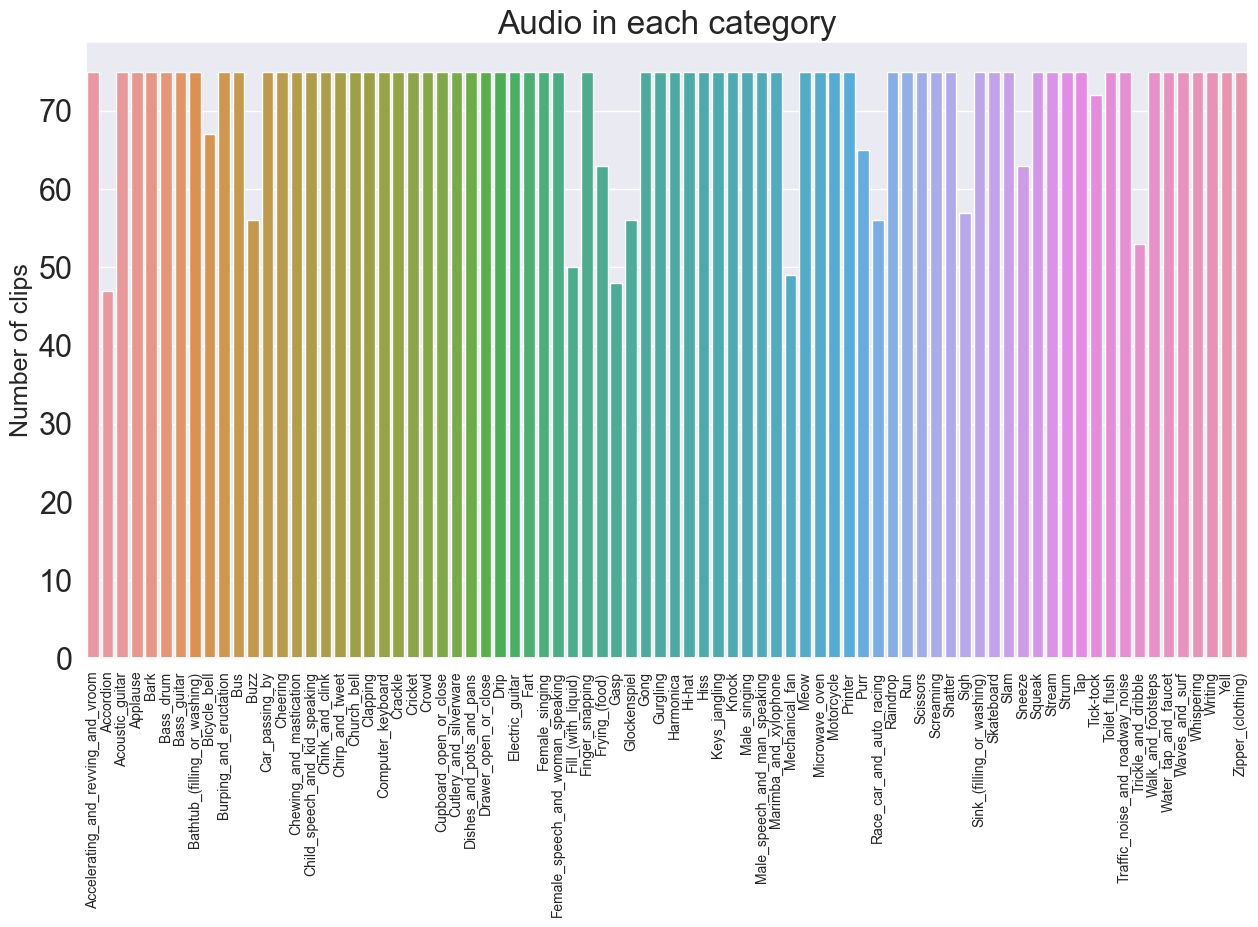

In [11]:
categories = list(df.columns.values)
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax= sns.barplot(categories[2:], df.iloc[:,2:].sum().values)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=10)
plt.title("Audio in each category", fontsize=24)
plt.ylabel('Number of clips', fontsize=18)
# plt.xlabel('Class Type ', fontsize=18)
#adding the text labels
# rects = ax.patches
# labels = df.iloc[:,2:].sum().values
# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()


In [12]:
test_files = [ df.loc[df[l]==1]["fname"].values for l in labels]
test_files[0][0]

'0199c0a0.wav'

Sampling Rate:  44100


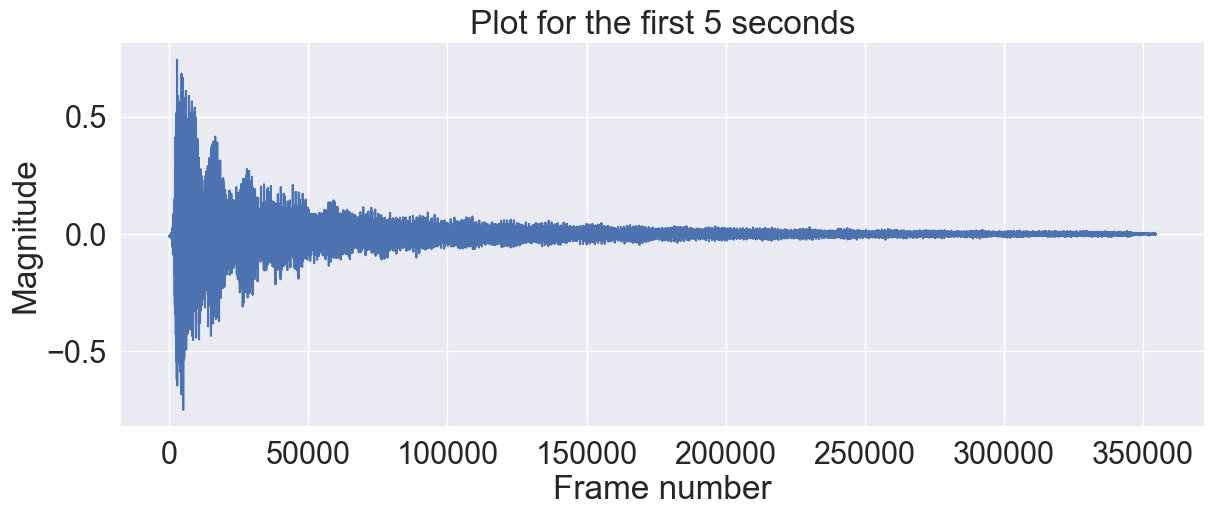

In [41]:
audio_path = f"data/train_curated/{test_files[2][0]}"
x, sampling_rate = librosa.load(audio_path,sr=None)
print('Sampling Rate: ', sampling_rate)
plt.figure(figsize=(14, 5))
plt.plot(x[:])
plt.title('Plot for the first 5 seconds')
plt.xlabel('Frame number')
plt.ylabel('Magnitude')
plt.show()


In [14]:
x, sampling_rate = librosa.load(audio_path, sr=None)
sampling_rate = librosa.get_samplerate(audio_path)
print('sampling rate: ', sampling_rate)
duration = librosa.get_duration(y=x)
print('duration: ', duration)


sampling rate:  44100
duration:  2.3160997732426303


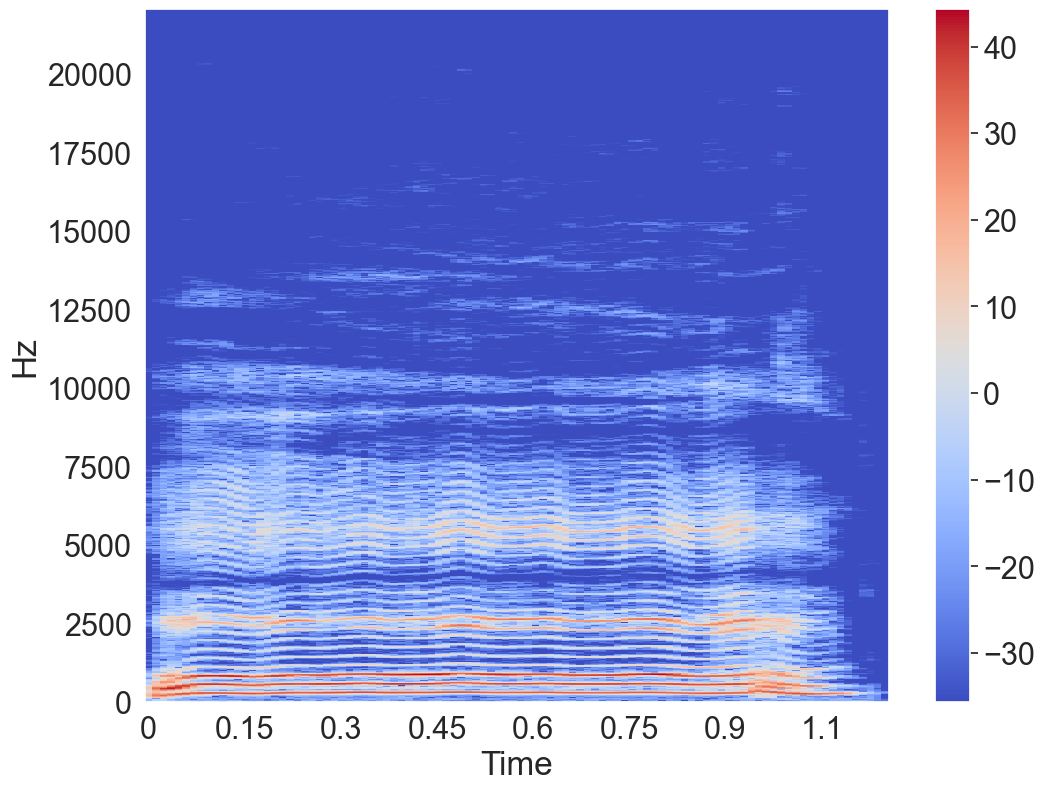

In [15]:
S = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(S))
fig = plt.figure(figsize=(12,9))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()

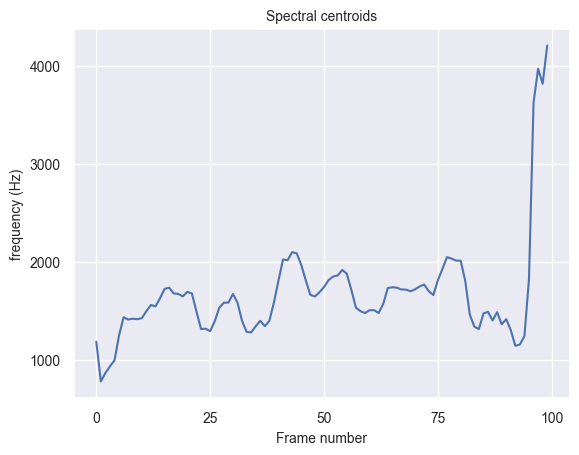

In [16]:
plt.plot(librosa.feature.spectral_centroid(y=x, sr=sampling_rate)[0])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Frame number',fontsize=10)
plt.ylabel('frequency (Hz)',fontsize=10)
plt.title('Spectral centroids',fontsize=10)
plt.show()

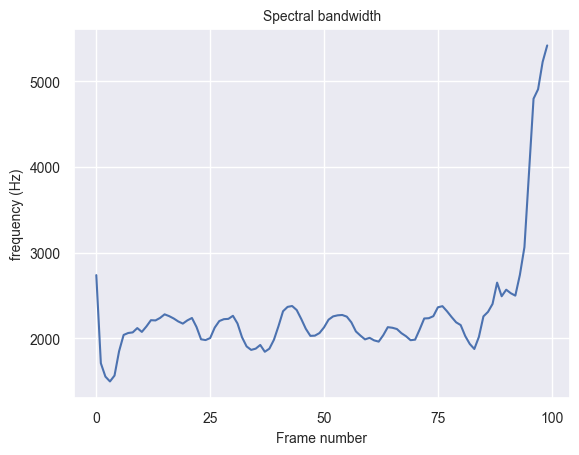

In [17]:
spec_bw = librosa.feature.spectral_bandwidth(y=x, sr=sampling_rate)
plt.plot(spec_bw.reshape(-1))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Frame number',fontsize=10)
plt.ylabel('frequency (Hz)',fontsize=10)
plt.title('Spectral bandwidth',fontsize=10)
plt.show()

In [ ]:
times = librosa.times_like(spec_bw)
centroid = librosa.feature.spectral_centroid(S=np.abs(S))

fig, ax = plt.subplots(figsize=(15,9))
img = librosa.display.specshow(Xdb, x_axis='time',
                         y_axis='log', sr=sampling_rate,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Spectral centroid plus/minus spectral bandwidth')
ax.fill_between(times, centroid[0] - spec_bw[0], centroid[0] + spec_bw[0],
                alpha=0.5, label='Centroid +- bandwidth')
ax.plot(times, centroid[0], label='Spectral centroid', color='w')
ax.legend(loc='lower right')

In [19]:
mfcc = librosa.feature.mfcc(y=x,sr=sampling_rate,n_mfcc=40)

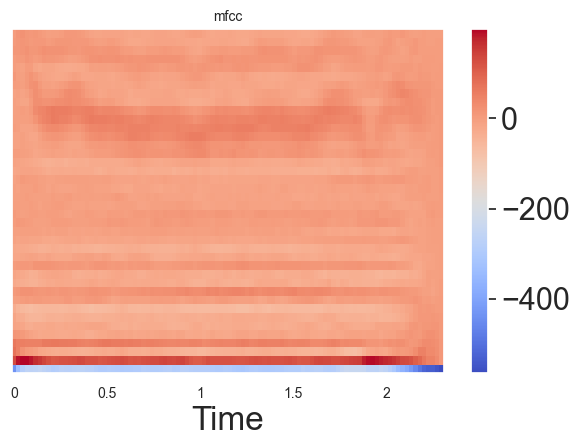

In [20]:
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.title('mfcc',fontsize=10)
plt.show()

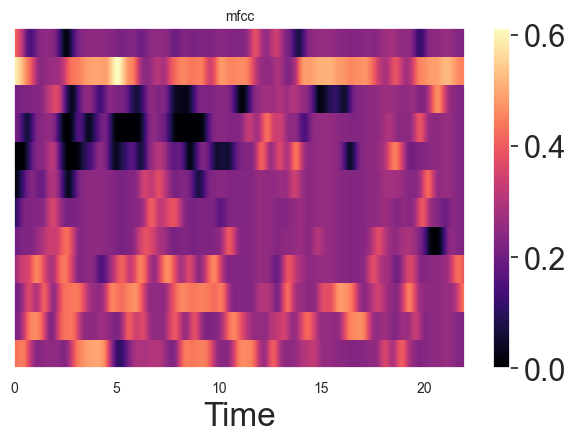

In [126]:
chroma = librosa.feature.chroma_cens(y=x,sr=sampling_rate)
librosa.display.specshow(chroma, x_axis='time')
plt.colorbar()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.title('mfcc',fontsize=10)
plt.show()

In [22]:
chroma.shape

(12, 100)

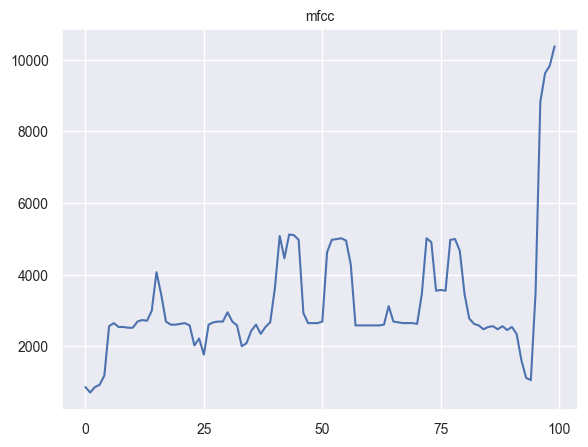

In [23]:
spec_roll = librosa.feature.spectral_rolloff(y=x,sr=sampling_rate)
# librosa.display.specshow(spec_roll, x_axis='time')
plt.plot(spec_roll.reshape(-1))
# plt.colorbar()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.title('mfcc',fontsize=10)
plt.show()

In [24]:
spec_roll.shape

(1, 100)

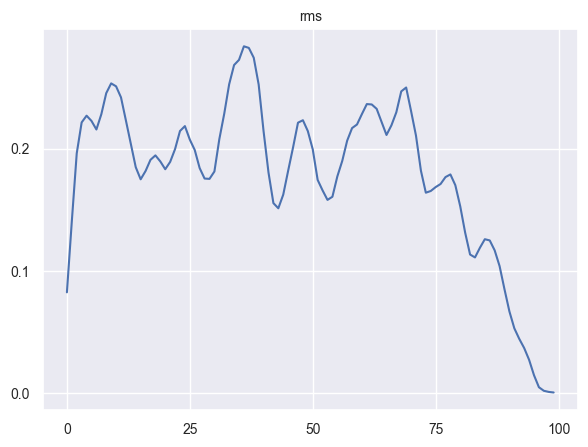

In [25]:
rms = librosa.feature.rms(y=x)
# librosa.display.specshow(rms, x_axis='time')
# plt.colorbar()
plt.plot(rms.reshape(-1))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.title('rms',fontsize=10)
plt.show()

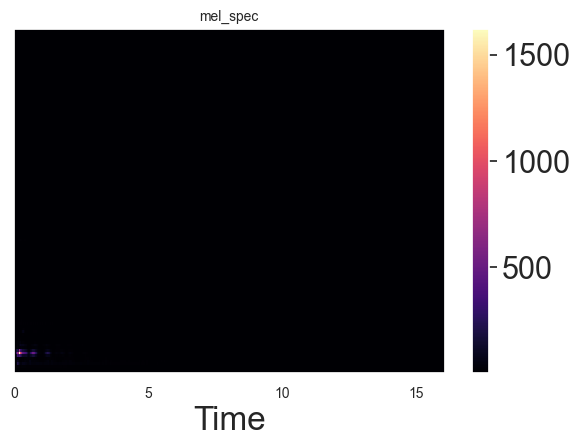

In [42]:
mel_spec = librosa.feature.melspectrogram(y=x,sr=sampling_rate,n_mels=128)
librosa.display.specshow(mel_spec, x_axis='time')
plt.colorbar()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.title('mel_spec',fontsize=10)
plt.show()

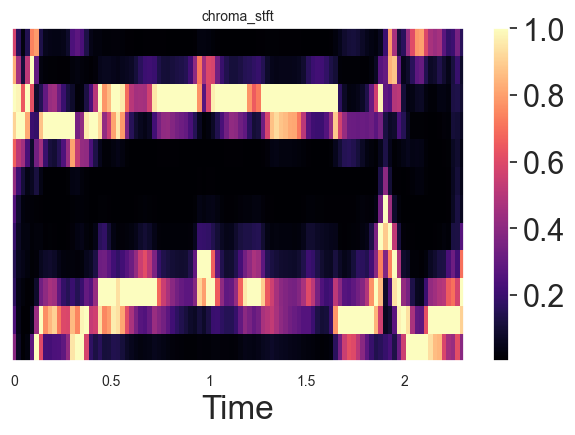

In [27]:
chroma_stft = librosa.feature.chroma_stft(y=x,sr=sampling_rate)
librosa.display.specshow(chroma_stft, x_axis='time')
plt.colorbar()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.title('chroma_stft',fontsize=10)
plt.show()

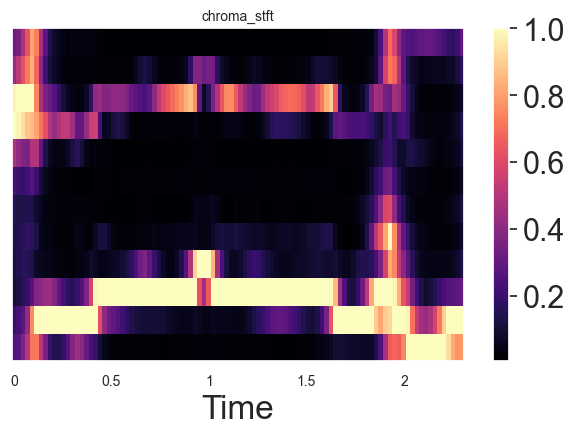

In [28]:
chroma_cqt = librosa.feature.chroma_cqt(y=x,sr=sampling_rate)
librosa.display.specshow(chroma_cqt, x_axis='time')
plt.colorbar()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.title('chroma_cqt',fontsize=10)
plt.show()

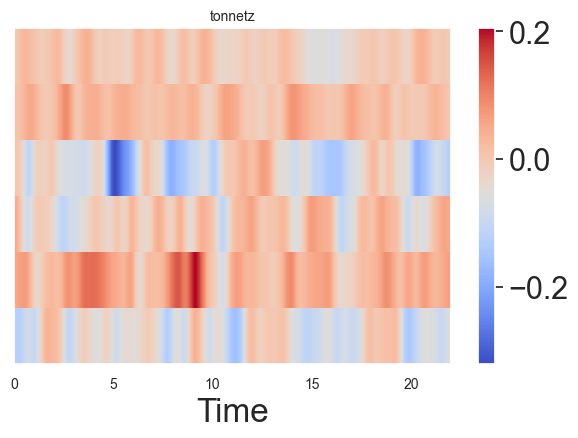

In [127]:
tonnetz = librosa.feature.tonnetz(y=x,sr=sampling_rate,chroma=chroma)
librosa.display.specshow(tonnetz, x_axis='time')
plt.colorbar()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.title('tonnetz',fontsize=10)
plt.show()

In [31]:
mfcc.shape

(40, 100)

In [32]:
chroma.shape

(12, 100)

In [33]:
chroma_cqt.shape

(12, 100)

In [34]:
chroma_stft.shape

(6, 100)

In [35]:
mel_spec.shape

(128, 100)

In [36]:
tonnetz.shape

(6, 100)

In [123]:
audio_path = f"data/train_curated/{test_files[80][0]}"
x,sr = librosa.load(audio_path,sr=None)
mel_spec = librosa.feature.melspectrogram(y=x,sr=sampling_rate,n_mels=128)
librosa.display.specshow(mel_spec, x_axis='time')
plt.colorbar()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.title('mel_spec',fontsize=10)
plt.show()

IndexError: list index out of range

In [132]:
def extract_features(fname):
    audio_path = f"data/train_curated/{fname}"
    x,sr = librosa.load(audio_path,sr=None)
    mfcc = librosa.feature.mfcc(y=x,sr=sr,n_mfcc=20)
    mel = librosa.feature.melspectrogram(y=x,sr=sr,n_mels=30)
    chroma_stft = librosa.feature.chroma_stft(y=x,sr=sr,n_chroma=12)
    tonnetz = librosa.feature.tonnetz(y=x,sr=sr,chroma=chroma_stft)
    print(mfcc.shape,mel.shape,chroma_stft.shape,tonnetz.shape)
    features = (mfcc,chroma_stft,mel,tonnetz)
    features = np.concatenate(features,axis=0)

    return features


In [135]:
fnames = list(df["fname"])
shapes = []
for f in fnames:
    audio_path = f"data/train_curated/{f}"
    x,sr = librosa.load(audio_path,sr=None)
    mfcc = librosa.feature.mfcc(y=x,sr=sr,n_mfcc=1)
    shapes.append(mfcc.shape[-1])
print(max(shapes))
# for fname in tqdm(fnames):
#     features.append(extract_features(fname))

4959


In [142]:
pd.DataFrame(shapes).quantile(0.9)

0    1753.2
Name: 0.9, dtype: float64

In [143]:
mfcc.shape

(1, 2397)

In [144]:
feat = np.load('freeaudio_features.npy')

In [145]:
feat.shape

(4970, 68, 1800)

In [147]:
len(labels)

80

In [151]:
df.iloc[:3,2:].to_numpy().shape

(3, 80)

: 